## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, I will reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [1]:
# Importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## 2. Alarming Mortality Rate

The table presented above provides data on the childbirth cases at the two clinics within the Vienna General Hospital from 1841 to 1846. It becomes evident that childbirth during this period carried significant risks, as a concerning number of women lost their lives due to childbirth-related complications, particularly childbed fever.

This pattern becomes even more striking when we analyze the ratio of deaths in relation to the total number of women who underwent childbirth. To delve further into this matter, we will now focus our attention on the specific proportion of fatalities recorded at Clinic 1.


In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths']=(yearly['deaths']/yearly['births'])

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly.loc[yearly['clinic']=='clinic 1']
clinic_2 = yearly.loc[yearly['clinic']=='clinic 2']

# Print out clinic_1
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


## 3. Mortality Analysis at the Clinics

Upon plotting the ratio of deaths at Clinic 1 and Clinic 2, an intriguing pattern emerges...


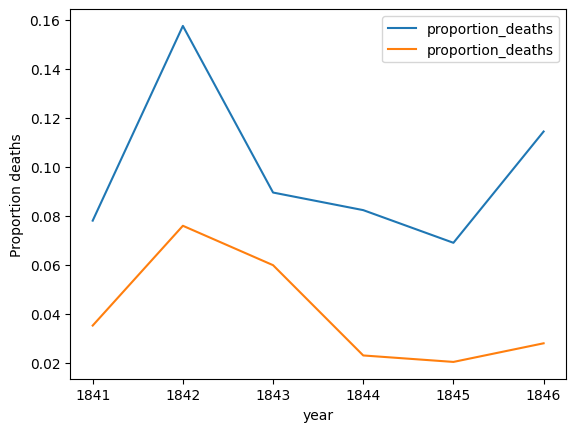

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
fig, ax = plt.subplots()
clinic_1.plot(x='year', y='proportion_deaths', ax=ax)
clinic_2.plot(x='year', y='proportion_deaths', ax=ax)
ax.set_ylabel("Proportion deaths")
plt.show()

## 4. Commencement of Handwashing Protocol

The persistent disproportion in death rates between Clinic 1 and Clinic 2 raises an intriguing question. Semmelweis, perplexed and concerned by this consistent pattern, observed a key distinction between the two clinics: Clinic 1 had a larger presence of medical students, while Clinic 2 primarily relied on midwife students. While midwives exclusively attended to birthing mothers, medical students were engaged in both patient care and postmortem examinations.

Semmelweis began to entertain the hypothesis that a certain element present on the deceased bodies might be transmitted from the hands of medical students, thereby triggering childbed fever. Driven by a desperate desire to curtail the alarming mortality rates, he issued a groundbreaking directive: <em>"Wash your hands!"</em> This unconventional and contentious request stemmed from a time when the concept of bacteria was yet unknown in Vienna.

Intriguiwely, we will now analyze the introduction of a handwashing practice by examining monthly data from Clinic 1 to determine its potential impact.


In [4]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths']=(monthly['deaths']/monthly['births'])

# Print out the first rows in monthly
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


## 5. Evaluating the Impact of Handwashing

Having successfully loaded the dataset, we can now visualize the evolving trend of mortality rates over a period of time. Although the exact point of initiation for mandatory handwashing is not indicated on the plot below, the profound impact of this practice becomes unmistakably apparent. The reduction in the proportion of deaths is so significant that it should be discernible at a glance!


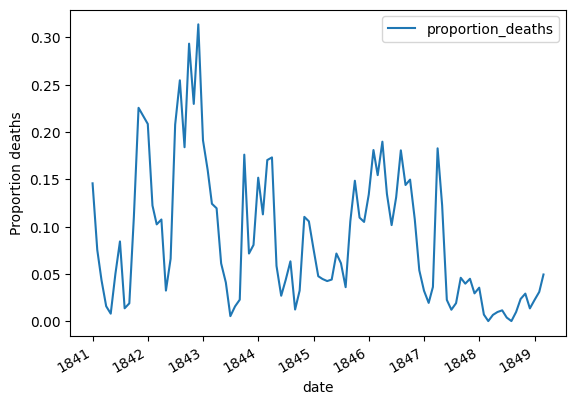

In [5]:
# Plot monthly proportion of deaths
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
fig, ax = plt.subplots()
monthly.plot(x='date', y='proportion_deaths', ax=ax)
ax.set_ylabel("Proportion deaths")
plt.show()

## 6. Accentuating the Impact of Handwashing

Beginning in the summer of 1847, a remarkable and conspicuous decline in the proportion of deaths is observed—undeniably coinciding with the moment Semmelweis introduced mandatory handwashing.

The discernible influence of handwashing becomes even more pronounced when we choose to accentuate this pivotal juncture on the graph.


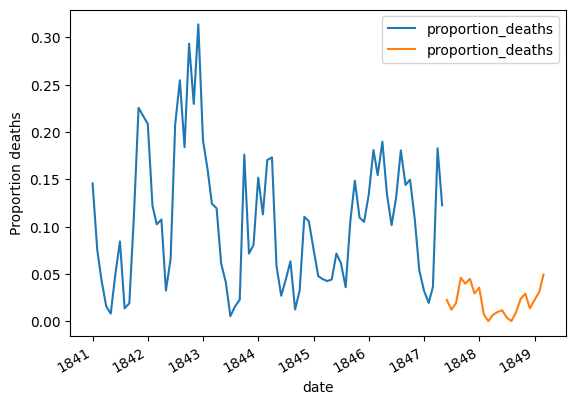

In [6]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly.loc[monthly['date']<handwashing_start]
after_washing = monthly.loc[monthly['date']>=handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
fig, ax = plt.subplots()
before_washing.plot(x='date', y='proportion_deaths', ax=ax)
after_washing.plot(x='date', y='proportion_deaths', ax=ax)
ax.set_ylabel('Proportion deaths')
plt.show()

## 7. Handwashing's Impact: Decreasing Mortality

Once more, the graph vividly illustrates the substantial impact of handwashing. The question now arises: to what extent did this practice contribute to the average monthly reduction in the proportion of deaths?


In [7]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = (after_proportion.mean())-(before_proportion.mean())
print(mean_diff)

-0.08395660751183336


## 8. Bootstrap Analysis: Semmelweis' Handwashing Data

The introduction of handwashing led to a notable reduction of approximately 8 percentage points in the proportion of deaths. The average mortality rate declined from 10% to just 2%, although by contemporary standards, the latter figure remains relatively high.

To gain insight into the potential variability surrounding the impact of handwashing on mortality reduction, an exploration of confidence intervals is in order. These intervals are calculated through the bootstrap method, providing a sense of uncertainty around the extent of handwashing's influence on mortalities.


In [9]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100590
0.975   -0.067445
dtype: float64

## 9. Dr. Semmelweis' Unfortunate Legacy

Remarkably, handwashing yielded a reduction in the death rate ranging between 6.7 and 10 percentage points, as indicated by a 95% confidence interval. This wealth of evidence pointed to the effectiveness of Semmelweis' uncomplicated yet potent procedure, capable of preserving numerous lives.

Tragically, despite the substantial evidence at hand, Semmelweis encountered skepticism and derision from his contemporaries. His groundbreaking hypothesis, linking childbed fever to a "substance" (now identified as bacteria) from autopsy room cadavers, was met with incredulity by the scientific community. Regrettably, his discovery was largely dismissed, ultimately resulting in his expulsion from the Vienna General Hospital in 1849.

This unfortunate outcome can be attributed in part to the infrequent use of statistics and statistical reasoning in 19th-century medical science. Semmelweis presented his data solely as extensive raw tables, lacking the inclusion of graphical representations or confidence intervals. Had he possessed access to the analytical tools we have employed here, he might have encountered greater success in persuading Viennese doctors to adopt the practice of handwashing.


In [11]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True